In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [251]:
df_original = pd.read_csv(r"C:\Users\René\Desktop\WBS-Project 4\df_audio_features_5000.csv")
df_original

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [252]:
df_original.columns  = df_original.columns.str.replace("^[ ]+|[ ]+$", "", regex=True)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5235 non-null   object 
 1   artist            5235 non-null   object 
 2   danceability      5235 non-null   float64
 3   energy            5235 non-null   float64
 4   key               5235 non-null   int64  
 5   loudness          5235 non-null   float64
 6   mode              5235 non-null   int64  
 7   speechiness       5235 non-null   float64
 8   acousticness      5235 non-null   float64
 9   instrumentalness  5235 non-null   float64
 10  liveness          5235 non-null   float64
 11  valence           5235 non-null   float64
 12  tempo             5235 non-null   float64
 13  type              5235 non-null   object 
 14  duration_ms       5235 non-null   int64  
 15  time_signature    5235 non-null   int64  
 16  id                5235 non-null   object 


In [253]:
df_original.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5.235000e+03,5235.000000
mean,0.509503,0.653565,5.254441,-9.338098,0.646227,0.083178,0.290043,0.257337,0.185354,0.443596,118.721407,2.479112e+05,3.902961
std,0.218041,0.288335,3.571559,6.294850,0.478185,0.071193,0.355985,0.370686,0.149410,0.277725,28.568463,1.356330e+05,0.420324
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.276000e+04,0.000000
25%,0.309000,0.479000,2.000000,-11.337000,0.000000,0.039000,0.002450,0.000001,0.092500,0.196000,96.174000,1.899910e+05,4.000000
50%,0.539000,0.738000,5.000000,-7.338000,1.000000,0.055800,0.095400,0.001880,0.125000,0.417000,119.180000,2.246670e+05,4.000000
75%,0.688000,0.893000,8.000000,-5.264000,1.000000,0.098650,0.565500,0.643000,0.237000,0.677000,134.019000,2.717200e+05,4.000000
max,0.967000,1.000000,11.000000,1.342000,1.000000,0.918000,0.996000,0.985000,0.987000,0.985000,213.990000,3.815787e+06,5.000000


Drop columns "type", "id" and "html" by using their index, because the name of at least one of these columns contains an undefined amount of spaces

In [254]:
df_dropped = df_original.drop(df_original.columns[[13, 16, 17]],axis = 1)
df_dropped

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4


In [255]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5235 non-null   object 
 1   artist            5235 non-null   object 
 2   danceability      5235 non-null   float64
 3   energy            5235 non-null   float64
 4   key               5235 non-null   int64  
 5   loudness          5235 non-null   float64
 6   mode              5235 non-null   int64  
 7   speechiness       5235 non-null   float64
 8   acousticness      5235 non-null   float64
 9   instrumentalness  5235 non-null   float64
 10  liveness          5235 non-null   float64
 11  valence           5235 non-null   float64
 12  tempo             5235 non-null   float64
 13  duration_ms       5235 non-null   int64  
 14  time_signature    5235 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 613.6+ KB


Remove all outliers in any column

In [256]:
# code found on "https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe"

from scipy import stats

# set index to columns "name" and "artist", because the outlier function only works on numeric data
df_dropped = df_dropped.set_index(["name", "artist"])


# remove outliers
df_wo_outliers = df_dropped[(np.abs(stats.zscore(df_dropped)) < 3).all(axis=1)]
df_wo_outliers

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
Desafinado,Stan Getz,0.466,0.1460,3,-17.500,1,0.0649,0.931,0.154000,0.1070,0.4230,142.885,249387,4
Madalena,Maria Gasolina,0.675,0.2070,11,-13.820,0,0.0545,0.963,0.414000,0.1120,0.6840,93.531,145187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale)",Edward Elgar,0.146,0.2530,7,-18.408,1,0.0398,0.884,0.896000,0.0973,0.1360,80.359,317240,4
"Also sprach Zarathustra, Op.30, TrV 176: Prelude (Sonnenaufgang)",Richard Strauss,0.115,0.3010,0,-13.321,1,0.0449,0.637,0.935000,0.1540,0.0409,77.276,109667,4
"Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo...",Karol Szymanowski,0.105,0.2310,7,-18.706,1,0.0516,0.673,0.053300,0.1570,0.0348,91.192,589227,4


1st Model

Scale data without outliers with MinMaxScaler

In [257]:
# 1. import the transformer 
from sklearn.preprocessing import MinMaxScaler
 
# 2. initialize the transformer (optionally, set parameters)
my_min_max = MinMaxScaler(feature_range=(0,1))
 
# 3. fit the transformer to the data
my_min_max.fit(df_wo_outliers)
 
# 4. use the transformer to transform the data
scaled_audio_features = my_min_max.transform(df_wo_outliers)
 
# 5. reconvert the transformed data back to a DataFrame
df_minmax = pd.DataFrame(scaled_audio_features,
             index=df_wo_outliers.index,
             columns=df_wo_outliers.columns)

df_minmax.reset_index()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Saudade De Bahia ...,Antônio Carlos Jobim,0.751491,0.398807,0.181818,0.526649,1.0,0.043892,0.218090,0.000002,0.154725,0.696749,0.510537,0.256812,0.5
1,Mulher Eu Sei ...,Chico César,0.710625,0.049313,0.363636,0.341579,1.0,0.089612,0.883417,0.000041,0.603929,0.521238,0.397299,0.247708,0.5
2,Rosa Morena ...,Kurt Elling,0.650983,0.118250,0.545455,0.284322,1.0,0.056328,0.920603,0.000348,0.149895,0.394537,0.485092,0.388865,0.5
3,Desafinado ...,Stan Getz,0.446653,0.145303,0.272727,0.362390,1.0,0.154718,0.935678,0.156345,0.154725,0.416346,0.621347,0.349654,0.5
4,Madalena ...,Maria Gasolina,0.677491,0.206425,1.000000,0.486921,0.0,0.116679,0.967839,0.420305,0.162776,0.687403,0.314896,0.181466,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,"Elgar: Enigma Variations, Op. 36: XV. EDU (Fin...",Edward Elgar,0.093218,0.252516,0.636364,0.331664,1.0,0.062911,0.888442,0.909645,0.139108,0.118289,0.233108,0.459174,0.5
4743,"Also sprach Zarathustra, Op.30, TrV 176: Prelu...",Richard Strauss,0.058979,0.300612,0.000000,0.503807,1.0,0.081565,0.640201,0.949239,0.230398,0.019524,0.213965,0.124134,0.5
4744,"Symphony No. 3 - ""Chant de la nuit"", Op. 27: L...",Karol Szymanowski,0.047935,0.230472,0.636364,0.321580,1.0,0.106072,0.676382,0.054112,0.235228,0.013189,0.300373,0.898184,0.5
4745,"Don Giovanni, K.527: Overture ...",Wolfgang Amadeus Mozart,0.362713,0.173359,0.181818,0.464959,1.0,0.053767,0.873367,0.879188,0.162776,0.294839,0.536045,0.542655,0.5


In [258]:
df_minmax

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,0.751491,0.398807,0.181818,0.526649,1.0,0.043892,0.218090,0.000002,0.154725,0.696749,0.510537,0.256812,0.5
Mulher Eu Sei,Chico César,0.710625,0.049313,0.363636,0.341579,1.0,0.089612,0.883417,0.000041,0.603929,0.521238,0.397299,0.247708,0.5
Rosa Morena,Kurt Elling,0.650983,0.118250,0.545455,0.284322,1.0,0.056328,0.920603,0.000348,0.149895,0.394537,0.485092,0.388865,0.5
Desafinado,Stan Getz,0.446653,0.145303,0.272727,0.362390,1.0,0.154718,0.935678,0.156345,0.154725,0.416346,0.621347,0.349654,0.5
Madalena,Maria Gasolina,0.677491,0.206425,1.000000,0.486921,0.0,0.116679,0.967839,0.420305,0.162776,0.687403,0.314896,0.181466,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale)",Edward Elgar,0.093218,0.252516,0.636364,0.331664,1.0,0.062911,0.888442,0.909645,0.139108,0.118289,0.233108,0.459174,0.5
"Also sprach Zarathustra, Op.30, TrV 176: Prelude (Sonnenaufgang)",Richard Strauss,0.058979,0.300612,0.000000,0.503807,1.0,0.081565,0.640201,0.949239,0.230398,0.019524,0.213965,0.124134,0.5
"Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo...",Karol Szymanowski,0.047935,0.230472,0.636364,0.321580,1.0,0.106072,0.676382,0.054112,0.235228,0.013189,0.300373,0.898184,0.5


In [259]:
df_minmax.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4747 entries, ('Saudade De Bahia                                                                                                                                                                 ', 'Antônio Carlos Jobim                            ') to ('Music for Strings, Percussion and Celesta, BB 114: II. Allegro                                                                                                                 ', 'Béla Bartók                                     ')
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4747 non-null   float64
 1   energy            4747 non-null   float64
 2   key               4747 non-null   float64
 3   loudness          4747 non-null   float64
 4   mode              4747 non-null   float64
 5   speechiness       4747 non-null   float64
 6   acousticness      4747 non-null   float64
 7   instru

Visualization of the inertia for x clusters to check the correct amount of clusters --> "Elbow method"

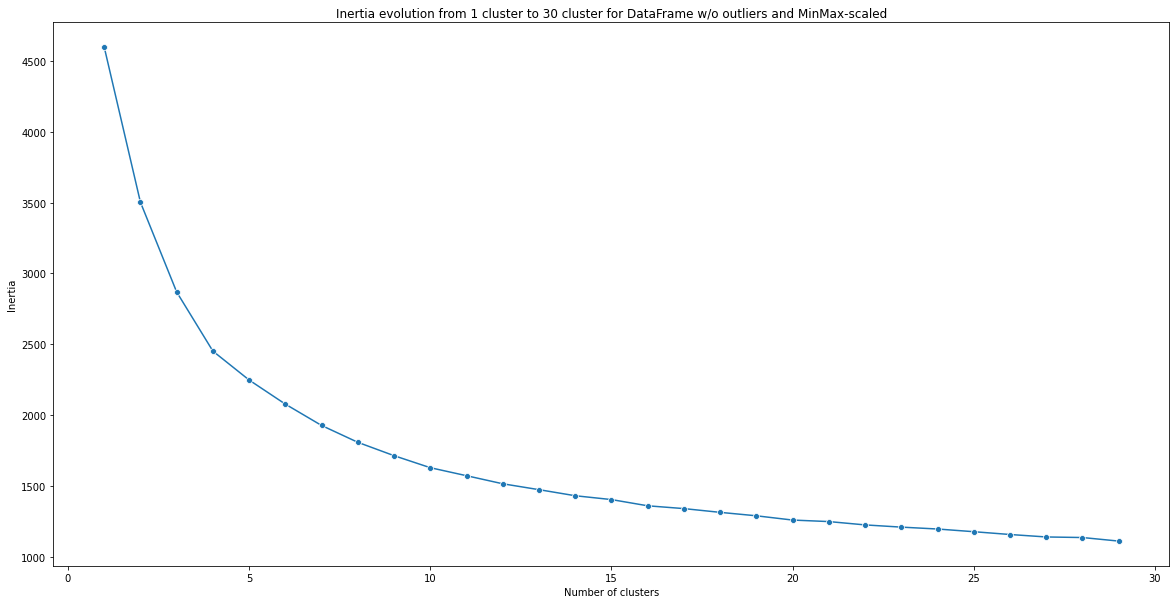

In [260]:
from sklearn.cluster import KMeans

max_k = 30
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(df_minmax).inertia_)

fig, ax = plt.subplots(figsize=(20, 10))
plt.title(f"Inertia evolution from 1 cluster to {max_k} cluster for DataFrame w/o outliers and MinMax-scaled")
sns.lineplot(x=range(1, max_k), y=inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

Silhouette score for 1st model w/ 5 clusters

In [261]:
from sklearn.cluster import KMeans
df_minmax_kmeans = KMeans(n_clusters=5).fit(df_minmax)

from sklearn.metrics import silhouette_score
silhouette_score(df_minmax, df_minmax_kmeans.labels_)

0.2532470572418613

Centroids for clusters of 1st model

In [262]:
columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]

centroids_minmax = pd.DataFrame(df_minmax_kmeans.cluster_centers_)
centroids_minmax.columns = columns
centroids_minmax

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.296573,0.888369,0.587786,0.691143,-3.330669e-16,0.279491,0.023864,0.636681,0.290902,0.234605,0.499815,0.372634,0.452926
1,0.245099,0.909907,0.441829,0.690148,1.000000e+00,0.304830,0.009836,0.590542,0.296665,0.220057,0.489707,0.359800,0.456442
2,0.659618,0.698638,0.536948,0.729752,-9.992007e-16,0.208225,0.210958,0.020294,0.249412,0.575613,0.479205,0.314316,0.490076
3,0.628751,0.687053,0.437132,0.713353,1.000000e+00,0.167213,0.238604,0.021934,0.256312,0.610983,0.481676,0.304528,0.490670
4,0.348997,0.166019,0.476617,0.344194,6.813354e-01,0.080136,0.923290,0.584147,0.199537,0.203656,0.410362,0.361637,0.389985


Defining cluster for each song in 1st model

In [263]:
clusters_minmax = df_minmax_kmeans.predict(df_minmax)

df_minmax["cluster"] = clusters_minmax
df_minmax

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,0.751491,0.398807,0.181818,0.526649,1.0,0.043892,0.218090,0.000002,0.154725,0.696749,0.510537,0.256812,0.5,3
Mulher Eu Sei,Chico César,0.710625,0.049313,0.363636,0.341579,1.0,0.089612,0.883417,0.000041,0.603929,0.521238,0.397299,0.247708,0.5,4
Rosa Morena,Kurt Elling,0.650983,0.118250,0.545455,0.284322,1.0,0.056328,0.920603,0.000348,0.149895,0.394537,0.485092,0.388865,0.5,4
Desafinado,Stan Getz,0.446653,0.145303,0.272727,0.362390,1.0,0.154718,0.935678,0.156345,0.154725,0.416346,0.621347,0.349654,0.5,4
Madalena,Maria Gasolina,0.677491,0.206425,1.000000,0.486921,0.0,0.116679,0.967839,0.420305,0.162776,0.687403,0.314896,0.181466,0.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale)",Edward Elgar,0.093218,0.252516,0.636364,0.331664,1.0,0.062911,0.888442,0.909645,0.139108,0.118289,0.233108,0.459174,0.5,4
"Also sprach Zarathustra, Op.30, TrV 176: Prelude (Sonnenaufgang)",Richard Strauss,0.058979,0.300612,0.000000,0.503807,1.0,0.081565,0.640201,0.949239,0.230398,0.019524,0.213965,0.124134,0.5,4
"Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo...",Karol Szymanowski,0.047935,0.230472,0.636364,0.321580,1.0,0.106072,0.676382,0.054112,0.235228,0.013189,0.300373,0.898184,0.5,4


In [264]:
df_minmax.groupby(by="cluster").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.296573,0.888369,0.587786,0.691143,0.000000,0.279491,0.023864,0.636681,0.290902,0.234605,0.499815,0.372634,0.452926
1,0.245099,0.909907,0.441829,0.690148,1.000000,0.304830,0.009836,0.590542,0.296665,0.220057,0.489707,0.359800,0.456442
2,0.659618,0.698638,0.536948,0.729752,0.000000,0.208225,0.210958,0.020294,0.249412,0.575613,0.479205,0.314316,0.490076
3,0.628751,0.687053,0.437132,0.713353,1.000000,0.167213,0.238604,0.021934,0.256312,0.610983,0.481676,0.304528,0.490670
4,0.348997,0.166019,0.476617,0.344194,0.681335,0.080136,0.923290,0.584147,0.199537,0.203656,0.410362,0.361637,0.389985


Show songs for each cluster of 1st model

In [265]:
df_minmax.loc[df_minmax["cluster"] == 0]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Manada,Bagunço,0.650983,0.484978,0.818182,0.565768,0.0,0.063643,0.116583,0.707614,0.123008,0.741406,0.410084,0.627965,0.5,0
Paranoid Android,Brad Mehldau,0.357190,0.573153,0.636364,0.513756,0.0,0.081565,0.672362,0.899492,0.132507,0.102711,0.361198,0.826819,0.5,0
Shadows,Au Revoir Simone,0.398056,0.612230,0.272727,0.609861,0.0,0.043160,0.188945,0.582741,0.120754,0.598089,0.758510,0.339301,0.5,0
Oats In The Water,Ben Howard,0.333996,0.474958,0.181818,0.635072,0.0,0.023043,0.276382,0.461929,0.285139,0.077163,0.528109,0.430350,0.5,0
How to Disappear Completely,Radiohead,0.117517,0.301614,0.545455,0.560522,0.0,0.043160,0.316583,0.802030,0.159556,0.189947,0.367737,0.522274,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Infection Of Death,Baphomet,0.197040,0.834672,0.545455,0.615072,0.0,0.234089,0.000765,0.904569,0.194977,0.262644,0.844005,0.274867,0.0,0
Darkness Forever (Bonus),Jungle Rot,0.241219,0.763531,0.454545,0.447159,0.0,0.217630,0.000074,0.911675,0.125906,0.018901,0.255883,0.586041,0.5,0
Dungeoneering,Tim Hecker,0.123040,0.656318,0.727273,0.683733,0.0,0.104243,0.551759,0.898477,0.236838,0.052134,0.188705,0.471139,0.5,0


In [266]:
df_minmax.loc[df_minmax["cluster"] == 1]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Under Your Spell,Desire,0.563729,0.599204,0.727273,0.609759,1.0,0.039503,0.027839,0.658883,0.133473,0.469311,0.389556,0.425537,0.5,1
La Nueva Reconquista de Graná,Grupo De Expertos Solynieve,0.184891,0.640286,0.818182,0.705492,1.0,0.088881,0.415075,0.766497,0.131702,0.544086,0.769419,0.331575,0.0,1
"Que No Sea Kang, Por Favor",Los Planetas,0.412414,0.493996,0.181818,0.648946,1.0,0.019386,0.000229,0.867005,0.240058,0.213833,0.317790,0.404855,0.5,1
Your Fucking Sunny Day,Lambchop,0.350563,0.491992,0.000000,0.702447,1.0,0.014265,0.073467,0.595939,0.539527,0.207602,0.383129,0.350966,0.5,1
San Francisco,Foxygen,0.308593,0.552111,0.727273,0.599168,1.0,0.072056,0.000081,0.625381,0.077604,0.481774,0.487699,0.241681,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
False Paradise,Megaslaughter,0.180473,0.931865,0.090909,0.614598,1.0,0.172641,0.001889,0.962437,0.307680,0.136982,0.332089,0.586299,0.5,1
Soulless Sanity (Promo 1995),Gorement,0.321847,0.950903,0.090909,0.748773,1.0,0.171178,0.000006,0.872081,0.401063,0.333264,0.560832,0.587934,0.5,1
Under The Moon's Fog,Vital Remains,0.198144,0.968938,0.272727,0.689080,1.0,0.447696,0.000346,0.406091,0.146675,0.012774,0.632915,0.600180,0.0,1


In [267]:
df_minmax.loc[df_minmax["cluster"] == 2]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Blue Bossa - Remastered,Joe Henderson,0.462116,0.432874,0.454545,0.619268,0.0,0.111924,0.611055,0.704569,0.156336,0.908609,0.245253,0.384776,0.5,2
Aqua De Coco,Marcos Valle,0.765849,0.732469,0.909091,0.629725,0.0,0.158010,0.489447,0.000924,0.713412,0.824489,0.280726,0.411268,0.5,2
Mas Que Nada,Rio Combo,0.614535,0.539085,0.454545,0.525194,0.0,0.031456,0.156784,0.002173,0.283529,0.928341,0.284564,0.235850,0.5,2
Chega De Saudade,João Gilberto,0.402474,0.244500,0.363636,0.413725,0.0,0.040600,0.738693,0.000000,0.286749,0.689480,0.826333,0.143227,0.5,2
Rebel Rebel,Seu Jorge,0.787939,0.205423,0.545455,0.424690,0.0,0.111192,0.883417,0.000318,0.207857,0.551355,0.482105,0.216437,0.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dance Party,Kelly Price,0.687431,0.867737,0.454545,0.840242,0.0,0.182151,0.020905,0.000000,0.106102,0.740368,0.529034,0.329287,0.5,2
Man On Fire,Idahams,0.784626,0.687379,0.181818,0.704240,0.0,0.517191,0.044724,0.000006,0.059733,0.801641,0.330438,0.273974,0.5,2
If He Did It Before....Same God - Live,Tye Tribbett,0.603490,0.790584,0.272727,0.771412,0.0,0.546452,0.036181,0.000004,0.073579,0.683249,0.726805,0.342810,0.5,2


In [268]:
df_minmax.loc[df_minmax["cluster"] == 3]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,0.751491,0.398807,0.181818,0.526649,1.0,0.043892,0.218090,0.000002,0.154725,0.696749,0.510537,0.256812,0.5,3
Brigas Nunca Mais,Paula Morelenbaum,0.698476,0.546099,0.909091,0.567054,1.0,0.063643,0.400000,0.077157,0.228788,0.642746,0.789910,0.276439,0.5,3
Previsao,Bossacucanova,0.676386,0.864731,0.090909,0.684850,1.0,0.057059,0.644221,0.363452,0.206247,0.533700,0.355033,0.239486,0.5,3
Samba de Verão,Marcos Valle,0.701789,0.404819,0.000000,0.460966,1.0,0.033285,0.817085,0.000159,0.510546,0.854606,0.447165,0.190547,0.5,3
Nova Bossa Nova,Marcos Valle,0.592445,0.739483,0.727273,0.595817,1.0,0.082663,0.525628,0.736041,0.217517,0.891993,0.324129,0.344833,0.5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Potter's House,Jerard & Jovaun,0.596863,0.560127,0.090909,0.703563,1.0,0.095465,0.117588,0.000011,0.201417,0.673902,0.553629,0.402304,0.5,3
Just As Sure,Tori Kelly,0.568147,0.562131,0.909091,0.677507,1.0,0.250183,0.624121,0.000000,0.162776,0.507737,0.578833,0.480422,0.5,3
Talkin' 'Bout Jesus,Gloria Gaynor,0.668655,0.814632,0.181818,0.800413,1.0,0.196050,0.031055,0.000000,0.128643,0.741406,0.336641,0.260513,0.5,3


In [269]:
df_minmax.loc[df_minmax["cluster"] == 4]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Mulher Eu Sei,Chico César,0.710625,0.049313,0.363636,0.341579,1.0,0.089612,0.883417,0.000041,0.603929,0.521238,0.397299,0.247708,0.5,4
Rosa Morena,Kurt Elling,0.650983,0.118250,0.545455,0.284322,1.0,0.056328,0.920603,0.000348,0.149895,0.394537,0.485092,0.388865,0.5,4
Desafinado,Stan Getz,0.446653,0.145303,0.272727,0.362390,1.0,0.154718,0.935678,0.156345,0.154725,0.416346,0.621347,0.349654,0.5,4
Madalena,Maria Gasolina,0.677491,0.206425,1.000000,0.486921,0.0,0.116679,0.967839,0.420305,0.162776,0.687403,0.314896,0.181466,0.5,4
The Girl From Ipanema,Stan Getz,0.639938,0.139291,0.727273,0.386417,1.0,0.059985,0.871357,0.001685,0.151505,0.379998,0.537106,0.460380,0.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale)",Edward Elgar,0.093218,0.252516,0.636364,0.331664,1.0,0.062911,0.888442,0.909645,0.139108,0.118289,0.233108,0.459174,0.5,4
"Also sprach Zarathustra, Op.30, TrV 176: Prelude (Sonnenaufgang)",Richard Strauss,0.058979,0.300612,0.000000,0.503807,1.0,0.081565,0.640201,0.949239,0.230398,0.019524,0.213965,0.124134,0.5,4
"Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo...",Karol Szymanowski,0.047935,0.230472,0.636364,0.321580,1.0,0.106072,0.676382,0.054112,0.235228,0.013189,0.300373,0.898184,0.5,4


Show scatterplot for danceability vs. tempo for 1st model

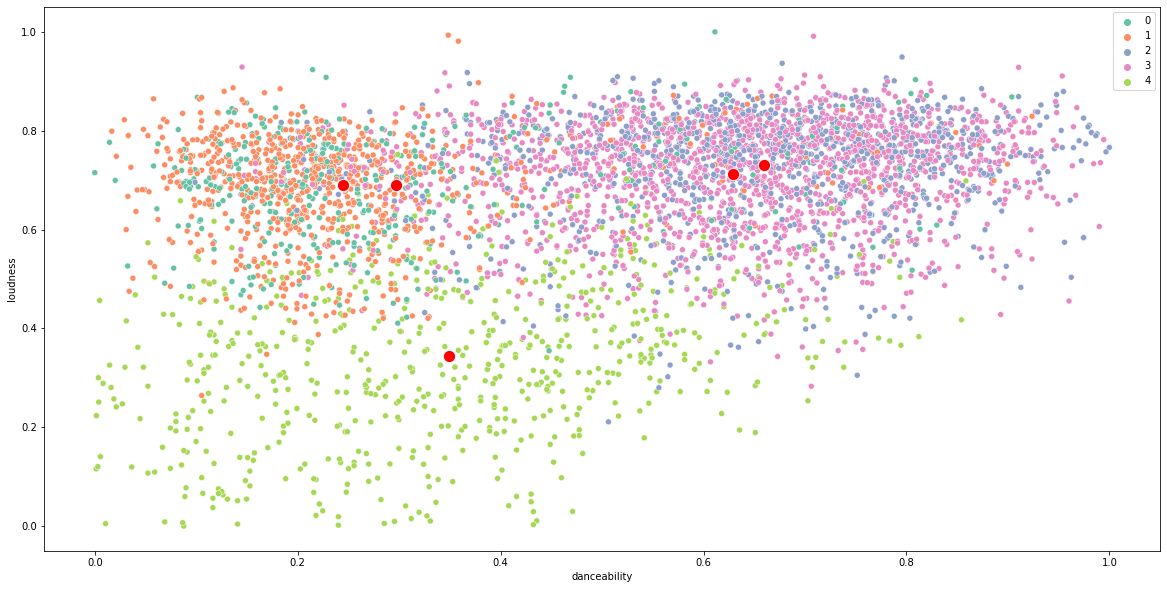

In [270]:
df_minmax_plot = df_minmax.reset_index()

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_minmax_plot, x="danceability", y="loudness", hue="cluster", palette="Set2")
sns.scatterplot(data=centroids_minmax, x="danceability", y="loudness", color="red", s=150)
plt.show()

Show scatterplot for danceability vs. duration_ms for 1st model

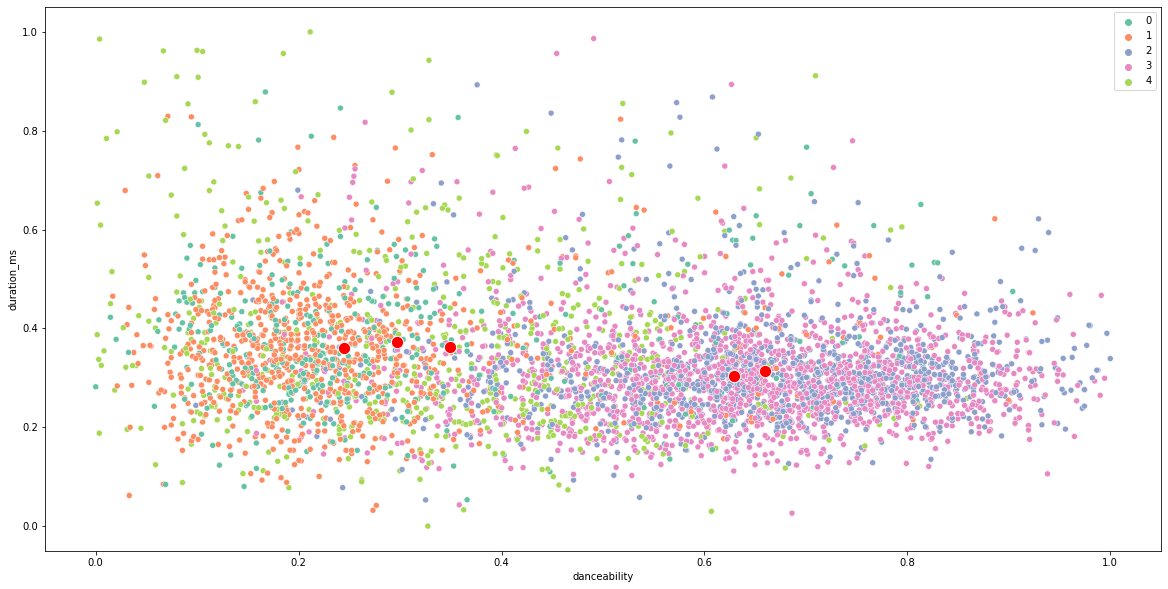

In [271]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_minmax_plot, x="danceability", y="duration_ms", hue="cluster", palette="Set2")
sns.scatterplot(data=centroids_minmax, x="danceability", y="duration_ms", color="red", s=150)
plt.show()

Show scatterplot for danceability vs. time_signature for 1st model

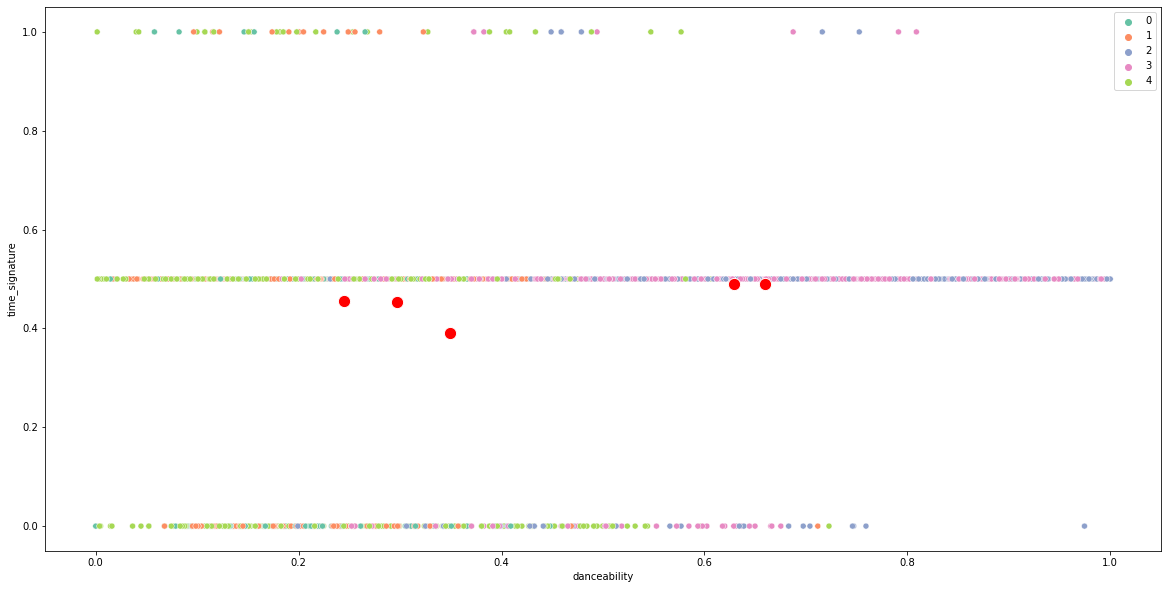

In [272]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_minmax_plot, x="danceability", y="time_signature", hue="cluster", palette="Set2")
sns.scatterplot(data=centroids_minmax, x="danceability", y="time_signature", color="red", s=150)
plt.show()

2nd Model

Scale data without outliers with StandardScaler

In [273]:
# 1. import the transformer 
from sklearn.preprocessing import StandardScaler
 
# 2. initialize the transformer (optionally, set parameters)
my_standard = StandardScaler()
 
# 3. fit the transformer to the data
my_standard.fit(df_wo_outliers)
 
# 4. use the transformer to transform the data
scaled_audio_features = my_standard.transform(df_wo_outliers)
 
# 5. reconvert the transformed data back to a DataFrame
df_standard = pd.DataFrame(scaled_audio_features,
             index=df_wo_outliers.index,
             columns=df_wo_outliers.columns)

df_standard.reset_index()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Saudade De Bahia ...,Antônio Carlos Jobim,1.041118,-1.001827,-0.910298,-0.780569,0.733647,-0.769630,-0.152239,-0.673277,-0.557891,0.867386,0.212277,-0.597075,0.222956
1,Mulher Eu Sei ...,Chico César,0.869606,-2.282372,-0.351753,-1.864386,0.733647,-0.540088,1.782664,-0.673171,1.900034,0.254700,-0.447534,-0.671580,0.222956
2,Rosa Morena ...,Kurt Elling,0.619292,-2.029788,0.206792,-2.199697,0.733647,-0.707195,1.890808,-0.672337,-0.584320,-0.187593,0.064012,0.483684,0.222956
3,Desafinado ...,Stan Getz,-0.238268,-1.930663,-0.631026,-1.742508,0.733647,-0.213220,1.934651,-0.249059,-0.557891,-0.111461,0.857941,0.162771,0.222956
4,Madalena ...,Maria Gasolina,0.730543,-1.706714,1.603156,-1.013226,-1.363054,-0.404199,2.028181,0.467162,-0.513842,0.834758,-0.927676,-1.213723,0.222956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,"Elgar: Enigma Variations, Op. 36: XV. EDU (Fin...",Edward Elgar,-1.721615,-1.537835,0.486065,-1.922451,0.733647,-0.674141,1.797278,1.794925,-0.643346,-1.151939,-1.404236,1.059117,0.222956
4743,"Also sprach Zarathustra, Op.30, TrV 176: Prelu...",Richard Strauss,-1.865315,-1.361613,-1.468844,-0.914337,0.733647,-0.580487,1.075343,1.902358,-0.143832,-1.496711,-1.515779,-1.682947,0.222956
4744,"Symphony No. 3 - ""Chant de la nuit"", Op. 27: L...",Karol Szymanowski,-1.911669,-1.618603,0.486065,-1.981507,0.733647,-0.457453,1.180564,-0.526457,-0.117403,-1.518826,-1.012301,4.652098,0.222956
4745,"Don Giovanni, K.527: Overture ...",Wolfgang Amadeus Mozart,-0.590563,-1.827867,-0.910298,-1.141841,0.733647,-0.720049,1.753436,1.712284,-0.513842,-0.535628,0.360903,1.742345,0.222956


Visualization of the inertia for x clusters to check the correct amount of clusters --> "Elbow method"

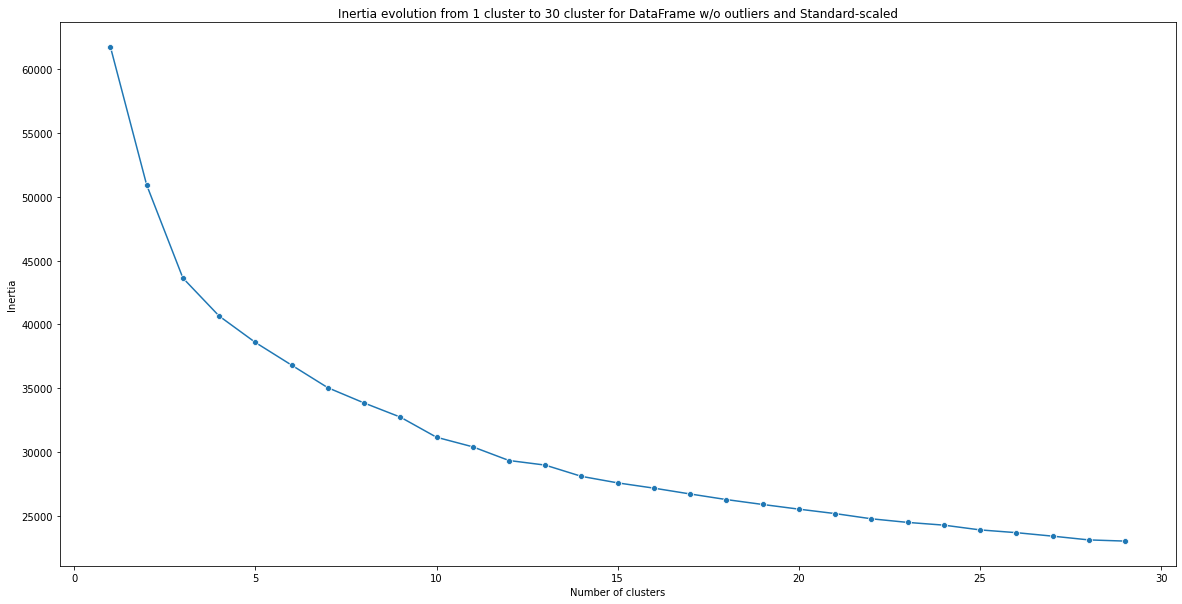

In [274]:
from sklearn.cluster import KMeans

max_k = 30
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(df_standard).inertia_)

fig, ax = plt.subplots(figsize=(20, 10))
plt.title(f"Inertia evolution from 1 cluster to {max_k} cluster for DataFrame w/o outliers and Standard-scaled")
sns.lineplot(x=range(1, max_k), y=inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

Silhouette Score for 2nd Model w/ 5 clusters

In [275]:
from sklearn.cluster import KMeans
df_standard_kmeans = KMeans(n_clusters=5).fit(df_standard)


from sklearn.metrics import silhouette_score
silhouette_score(df_standard, df_standard_kmeans.labels_)

0.14607851241745023

Centroids of clusters for 2nd model

In [276]:
columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]

centroids_standard = pd.DataFrame(df_standard_kmeans.cluster_centers_)
centroids_standard.columns = columns
centroids_standard

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.864487,0.278488,-0.015679,0.573574,-0.060020,2.424593,-0.267559,-0.608742,0.119351,0.468738,-0.045693,-0.150327,0.203542
1,0.635405,0.177364,0.217202,0.468747,-1.363054,-0.280562,-0.263779,-0.502826,-0.035524,0.411358,0.071190,-0.114665,0.193680
2,-0.573747,-1.805796,0.000357,-1.767396,-0.005866,-0.592486,1.820528,0.745852,-0.318265,-0.772653,-0.368447,0.283407,-0.524666
3,0.511326,0.052993,-0.141458,0.302369,0.733647,-0.460467,-0.094020,-0.561744,-0.036717,0.623157,0.081755,-0.274959,0.177255
4,-1.132585,0.870029,0.021759,0.164964,0.129575,0.502783,-0.754475,0.901067,0.250748,-0.849692,0.081839,0.339494,-0.128240


Defining cluster for each song in 2nd model

In [277]:
clusters_standard = df_standard_kmeans.predict(df_standard)

df_standard["cluster"] = clusters_standard
df_standard

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,1.041118,-1.001827,-0.910298,-0.780569,0.733647,-0.769630,-0.152239,-0.673277,-0.557891,0.867386,0.212277,-0.597075,0.222956,3
Mulher Eu Sei,Chico César,0.869606,-2.282372,-0.351753,-1.864386,0.733647,-0.540088,1.782664,-0.673171,1.900034,0.254700,-0.447534,-0.671580,0.222956,2
Rosa Morena,Kurt Elling,0.619292,-2.029788,0.206792,-2.199697,0.733647,-0.707195,1.890808,-0.672337,-0.584320,-0.187593,0.064012,0.483684,0.222956,2
Desafinado,Stan Getz,-0.238268,-1.930663,-0.631026,-1.742508,0.733647,-0.213220,1.934651,-0.249059,-0.557891,-0.111461,0.857941,0.162771,0.222956,2
Madalena,Maria Gasolina,0.730543,-1.706714,1.603156,-1.013226,-1.363054,-0.404199,2.028181,0.467162,-0.513842,0.834758,-0.927676,-1.213723,0.222956,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale)",Edward Elgar,-1.721615,-1.537835,0.486065,-1.922451,0.733647,-0.674141,1.797278,1.794925,-0.643346,-1.151939,-1.404236,1.059117,0.222956,2
"Also sprach Zarathustra, Op.30, TrV 176: Prelude (Sonnenaufgang)",Richard Strauss,-1.865315,-1.361613,-1.468844,-0.914337,0.733647,-0.580487,1.075343,1.902358,-0.143832,-1.496711,-1.515779,-1.682947,0.222956,2
"Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo...",Karol Szymanowski,-1.911669,-1.618603,0.486065,-1.981507,0.733647,-0.457453,1.180564,-0.526457,-0.117403,-1.518826,-1.012301,4.652098,0.222956,2


In [278]:
df_standard.groupby(by="cluster").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.864487,0.278488,-0.015679,0.573574,-0.060020,2.424593,-0.267559,-0.608742,0.119351,0.468738,-0.045693,-0.150327,0.203542
1,0.635405,0.177364,0.217202,0.468747,-1.363054,-0.280562,-0.263779,-0.502826,-0.035524,0.411358,0.071190,-0.114665,0.193680
2,-0.573747,-1.805796,0.000357,-1.767396,-0.005866,-0.592486,1.820528,0.745852,-0.318265,-0.772653,-0.368447,0.283407,-0.524666
3,0.511326,0.052993,-0.141458,0.302369,0.733647,-0.460467,-0.094020,-0.561744,-0.036717,0.623157,0.081755,-0.274959,0.177255
4,-1.132585,0.870029,0.021759,0.164964,0.129575,0.502783,-0.754475,0.901067,0.250748,-0.849692,0.081839,0.339494,-0.128240


Show songs for each cluster of 2nd model

In [279]:
df_standard.loc[df_standard["cluster"] == 0]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Karoliina Kaunis,Maria Gasolina,1.092109,-1.677344,1.603156,-1.380047,-1.363054,3.975470,1.019810,-0.660500,-0.697085,-0.260101,0.403993,0.189720,0.222956,0
Vai (Menina amanhã de manhã),Tom Zé,0.712001,-0.153759,-0.072480,-0.328929,0.733647,2.947120,1.800201,-0.673282,-0.337647,1.233548,0.306561,-0.818133,0.222956,0
Máquina de Ritmo - Ao Vivo,Gilberto Gil,0.322622,-1.379970,-0.910298,-1.545721,0.733647,2.708396,1.782664,0.974026,1.944083,0.200320,1.935737,1.517244,0.222956,0
Baião Destemperado,Barbatuques,1.588103,0.253754,-1.189571,0.079707,0.733647,1.496412,0.455706,1.062176,0.402374,1.052280,-0.848660,-0.966615,0.222956,0
Alma Não Tem Cor,Perotá Chingó,0.605385,-0.715466,0.486065,0.371222,0.733647,2.836940,0.970122,-0.673282,-1.104097,-0.296354,-1.390814,0.093114,0.222956,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Man On Fire,Idahams,1.180182,0.055504,-0.910298,0.259452,-1.363054,1.606592,-0.656425,-0.673265,-1.077667,1.233548,-0.837118,-0.456612,0.222956,0
His Love,The Clark Sisters,0.892784,0.808119,-1.189571,0.703363,0.733647,3.240934,0.034821,-0.673282,-0.993093,1.117536,-1.059298,0.127804,0.222956,0
He Did It - Live,The Brown Boyz,-0.103840,0.844831,-1.189571,0.747754,0.733647,2.102404,-0.783070,-0.673282,1.600502,1.081282,-0.330493,-0.412318,0.222956,0


In [280]:
df_standard.loc[df_standard["cluster"] == 1]

danceability  \
name                                               artist                                                           
Blue Bossa - Remastered                        ... Joe Henderson                                        -0.173372   
Aqua De Coco                                   ... Marcos Valle                                          1.101379   
Mas Que Nada                                   ... Rio Combo                                             0.466321   
Mariana                                        ... Bïa                                                   1.453674   
                                                   Seu Jorge                                             0.461686   
...                                                                                                           ...   
Beautiful Scars                                ... Merry Clayton                                        -0.131653   
High Up                                        ... Jonathan Traylor                                      0.948409   
We Gon’ Be Alright                             ... Tye Tribbett                                          1.430497   
Dance Party                                    ... Kelly Price                                           0.772262   
In The Room                                    ... Lexi                                                  0.155746   

                                                                                                       energy  \
name                                               artist                                                       
Blue Bossa - Remastered                        ... Joe Henderson                                    -0.877003   
Aqua De Coco                                   ... Marcos Valle                                      0.220712   
Mas Que Nada                                   ... Rio Combo                                        -0.487846   
Mariana                                        ... Bïa                                              -0.888017   
                                                   Seu Jorge                                        -0.535573   
...                                                                                                       ...   
Beautiful Scars                                ... Merry Clayton                                    -0.355680   
High Up                                        ... Jonathan Traylor                                 -0.788892   
We Gon’ Be Alright                             ... Tye Tribbett                                     -0.542916   
Dance Party                                    ... Kelly Price                                       0.716336   
In The Room                                    ... Lexi                                             -0.076662   

                                                                                                          key  \
name                                               artist                                                       
Blue Bossa - Remastered                        ... Joe Henderson                                    -0.072480   
Aqua De Coco                                   ... Marcos Valle                                      1.323883   
Mas Que Nada                                   ... Rio Combo                                        -0.072480   
Mariana                                        ... Bïa                                               1.603156   
                                                   Seu Jorge                                         1.044610   
...                                                                                                       ...   
Beautiful Scars                                ... Merry Clayton                                    -1.468844   
High Up                                        ... Jonathan Traylor                         

In [281]:
df_standard.loc[df_standard["cluster"] == 2]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Mulher Eu Sei,Chico César,0.869606,-2.282372,-0.351753,-1.864386,0.733647,-0.540088,1.782664,-0.673171,1.900034,0.254700,-0.447534,-0.671580,0.222956,2
Rosa Morena,Kurt Elling,0.619292,-2.029788,0.206792,-2.199697,0.733647,-0.707195,1.890808,-0.672337,-0.584320,-0.187593,0.064012,0.483684,0.222956,2
Desafinado,Stan Getz,-0.238268,-1.930663,-0.631026,-1.742508,0.733647,-0.213220,1.934651,-0.249059,-0.557891,-0.111461,0.857941,0.162771,0.222956,2
Madalena,Maria Gasolina,0.730543,-1.706714,1.603156,-1.013226,-1.363054,-0.404199,2.028181,0.467162,-0.513842,0.834758,-0.927676,-1.213723,0.222956,2
The Girl From Ipanema,Stan Getz,0.572937,-1.952691,0.765338,-1.601804,0.733647,-0.688831,1.747590,-0.668709,-0.575510,-0.238349,0.367090,1.068985,0.222956,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale)",Edward Elgar,-1.721615,-1.537835,0.486065,-1.922451,0.733647,-0.674141,1.797278,1.794925,-0.643346,-1.151939,-1.404236,1.059117,0.222956,2
"Also sprach Zarathustra, Op.30, TrV 176: Prelude (Sonnenaufgang)",Richard Strauss,-1.865315,-1.361613,-1.468844,-0.914337,0.733647,-0.580487,1.075343,1.902358,-0.143832,-1.496711,-1.515779,-1.682947,0.222956,2
"Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo...",Karol Szymanowski,-1.911669,-1.618603,0.486065,-1.981507,0.733647,-0.457453,1.180564,-0.526457,-0.117403,-1.518826,-1.012301,4.652098,0.222956,2


In [282]:
df_standard.loc[df_standard["cluster"] == 3]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,1.041118,-1.001827,-0.910298,-0.780569,0.733647,-0.769630,-0.152239,-0.673277,-0.557891,0.867386,0.212277,-0.597075,0.222956,3
Brigas Nunca Mais,Paula Morelenbaum,0.818616,-0.462147,1.323883,-0.543948,0.733647,-0.670468,0.376790,-0.463925,-0.152642,0.678868,1.840114,-0.436440,0.222956,3
Previsao,Bossacucanova,0.725907,0.705322,-1.189571,0.145898,0.733647,-0.703522,1.087034,0.312899,-0.275978,0.298205,-0.693810,-0.738872,0.222956,3
Samba de Verão,Marcos Valle,0.832523,-0.979799,-1.468844,-1.165226,0.733647,-0.822884,1.589758,-0.672850,1.389068,1.418441,-0.156974,-1.139403,0.222956,3
Nova Bossa Nova,Marcos Valle,0.373612,0.246411,0.765338,-0.375500,0.733647,-0.574978,0.742142,1.323872,-0.214310,1.548954,-0.873877,0.123312,0.222956,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
There Is More,Lexi,0.280903,-0.726480,1.603156,0.067222,0.733647,-0.683322,0.882437,-0.673282,-0.531462,-0.162216,0.011913,0.723237,0.222956,3
The Potter's House,Jerard & Jovaun,0.392154,-0.410749,-1.189571,0.255488,0.733647,-0.510707,-0.444521,-0.673253,-0.302408,0.787628,0.463364,0.593672,0.222956,3
Just As Sure,Tori Kelly,0.271632,-0.403407,1.323883,0.102894,0.733647,0.266065,1.028578,-0.673282,-0.513842,0.207571,0.610218,1.233015,0.222956,3


In [283]:
df_standard.loc[df_standard["cluster"] == 4]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Oats In The Water,Ben Howard,-0.711085,-0.722809,-0.910298,-0.145617,-1.363054,-0.874302,0.017284,0.580104,0.155700,-1.295503,0.314665,0.823211,0.222956,4
La Nueva Reconquista de Graná,Grupo De Expertos Solynieve,-1.336872,-0.117046,1.044610,0.266784,0.733647,-0.543761,0.420633,1.406513,-0.683871,0.334458,1.720721,0.014804,-3.213319,4
"Que No Sea Kang, Por Favor",Los Planetas,-0.381968,-0.653054,-0.910298,-0.064366,0.733647,-0.892665,-0.785824,1.679228,-0.090973,-0.818406,-0.910816,0.614557,0.222956,4
Come Saturday,The Pains Of Being Pure At Heart,-1.642813,0.976998,0.206792,0.720604,-1.363054,-0.090185,-0.786485,1.918886,1.036677,0.135064,2.209727,-0.525740,0.222956,4
Your Fucking Sunny Day,Lambchop,-0.641553,-0.660397,-1.468844,0.248948,0.733647,-0.918374,-0.572832,0.943724,1.547643,-0.840158,-0.530096,0.173511,0.222956,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
God Has His Hands On You,The Brown Boyz,-0.970671,0.158300,-0.351753,0.807008,0.733647,-0.343600,0.014361,-0.673282,1.697409,-0.067957,-0.445544,0.408162,-3.213319,4
I'm Getting Ready,Tasha Cobbs Leonard,-0.377332,-0.131731,0.765338,0.721793,0.733647,-0.681486,-0.759775,-0.673282,-0.293598,-0.658890,-0.925397,3.555301,0.222956,4
What Can I Do - Live,Tye Tribbett,-1.049474,-0.117046,-0.351753,0.483191,0.733647,-0.126912,-0.636550,-0.673282,2.252425,-0.814781,-1.310241,2.993435,0.222956,4


Show scatterplot for danceability vs. tempo for 2nd model

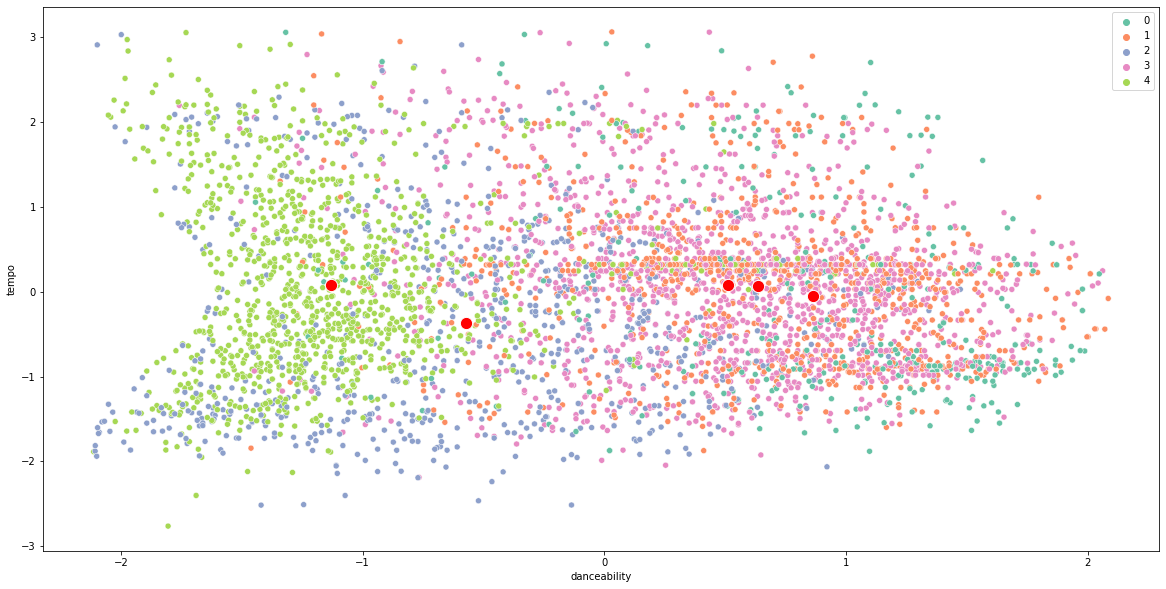

In [284]:
df_standard_plot = df_standard.reset_index()

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_standard_plot, x="danceability", y="tempo", hue="cluster", palette="Set2")
sns.scatterplot(data=centroids_standard, x="danceability", y="tempo", color="red", s=150)
plt.show()

Show scatterplot for danceability vs. duration_ms for 2nd model

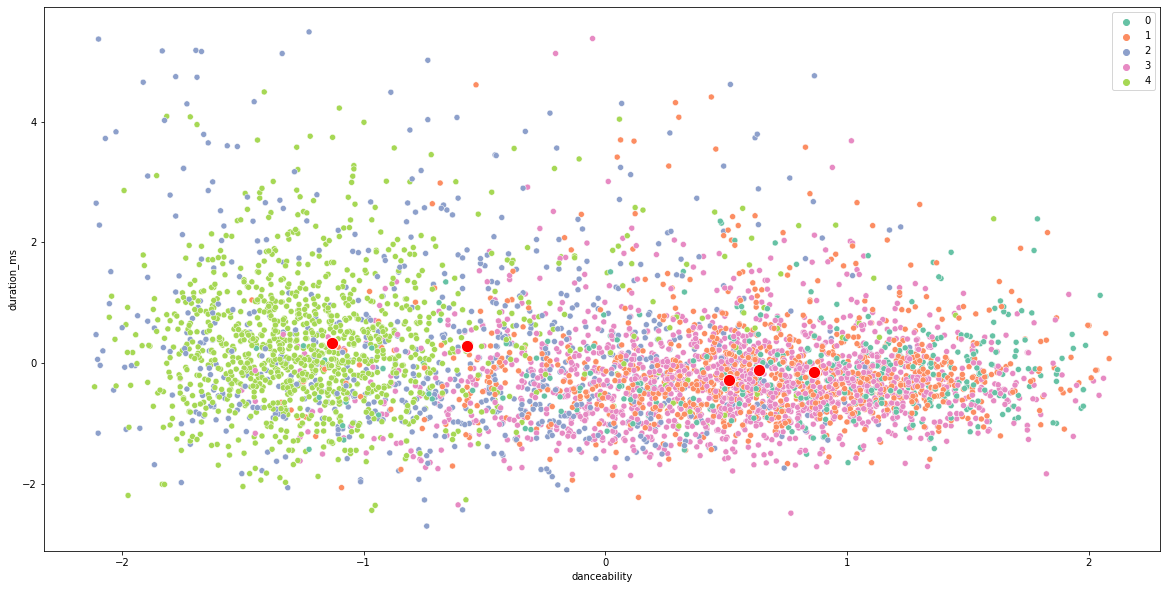

In [285]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_standard_plot, x="danceability", y="duration_ms", hue="cluster", palette="Set2")
sns.scatterplot(data=centroids_standard, x="danceability", y="duration_ms", color="red", s=150)
plt.show()

Show scatterplot for danceability vs. time_signature for 2nd model

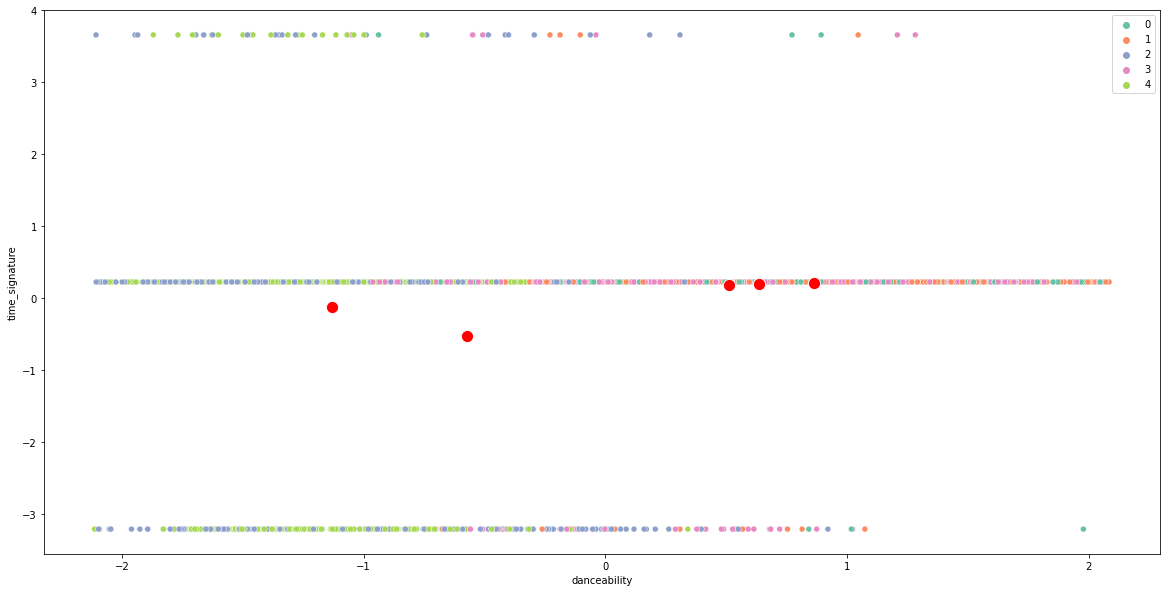

In [286]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_standard_plot, x="danceability", y="time_signature", hue="cluster", palette="Set2")
sns.scatterplot(data=centroids_standard, x="danceability", y="time_signature", color="red", s=150)
plt.show()

3rd Model

Scale data with outliers with RobustScaler

In [287]:
# 1. import the transformer 
from sklearn.preprocessing import RobustScaler
 
# 2. initialize the transformer (optionally, set parameters)
my_robust = RobustScaler()
 
# 3. fit the transformer to the data
my_robust.fit(df_dropped)
 
# 4. use the transformer to transform the data
scaled_audio_features = my_robust.transform(df_dropped)
 
# 5. reconvert the transformed data back to a DataFrame
df_robust = pd.DataFrame(scaled_audio_features,
             index=df_dropped.index,
             columns=df_dropped.columns)

df_robust.reset_index()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.313984,-1.157005,1.000000,-0.955541,-1.0,0.246438,1.063138,-0.002833,5.882353,-0.230769,-0.232633,0.385983,0.0
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.535620,-0.818841,-0.500000,-0.874033,0.0,-0.355407,0.215967,-0.002921,-0.124567,0.573805,0.154816,-0.401326,0.0
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.823219,-0.019324,-0.500000,-0.610901,0.0,4.881811,0.635112,-0.002825,-0.006920,1.014553,-0.673325,-0.885854,0.0
3,Mulher Eu Sei ...,Chico César,0.437995,-1.661353,-0.166667,-1.774576,0.0,-0.145851,1.391706,-0.002861,1.806228,0.222453,-0.327071,-0.470335,0.0
4,Rosa Morena ...,Kurt Elling,0.295515,-1.495169,0.166667,-2.053186,0.0,-0.298407,1.457419,-0.002390,-0.145329,-0.031185,0.046532,0.599701,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,-0.889182,-1.614976,-0.333333,-2.643175,0.0,-0.142498,1.459195,1.109053,-0.289273,-0.730769,-0.826371,9.425455,0.0
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,-0.926121,-1.538647,0.166667,-2.393381,0.0,-0.194468,1.349081,0.659597,-0.384775,-0.793139,-0.952464,7.712477,0.0
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,-1.264908,-1.780362,0.666667,-5.865470,0.0,-0.207879,1.519581,1.504077,-0.330796,-0.795426,-1.257947,0.165425,-1.0
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,-1.071240,-1.732367,-0.166667,-3.639881,0.0,-0.233026,1.398810,0.782458,-0.096886,-0.744075,-1.375902,1.096796,0.0


In [288]:
df_robust.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000
mean,-0.077828,-0.203950,0.042407,-0.329343,-0.353773,0.458981,0.345694,0.397289,0.417671,0.055294,-0.012118,0.284405,-0.097039
std,0.575306,0.696461,0.595260,1.036531,0.478185,1.193515,0.632244,0.576496,1.033978,0.577391,0.754881,1.659546,0.420324
min,-1.422164,-1.782609,-0.833333,-8.671497,-1.000000,-0.935457,-0.169434,-0.002924,-0.865052,-0.866944,-3.149161,-2.348089,-4.000000
25%,-0.606860,-0.625604,-0.500000,-0.658488,-1.000000,-0.281643,-0.165083,-0.002922,-0.224913,-0.459459,-0.607901,-0.424280,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.393140,0.374396,0.500000,0.341512,0.000000,0.718357,0.834917,0.997078,0.775087,0.540541,0.392099,0.575720,0.000000
max,1.129288,0.632850,1.000000,1.429277,0.000000,14.454317,1.599503,1.528960,5.965398,1.180873,2.505219,43.939361,1.000000


Visualization of the inertia for x clusters to check the correct amount of clusters --> "Elbow method"

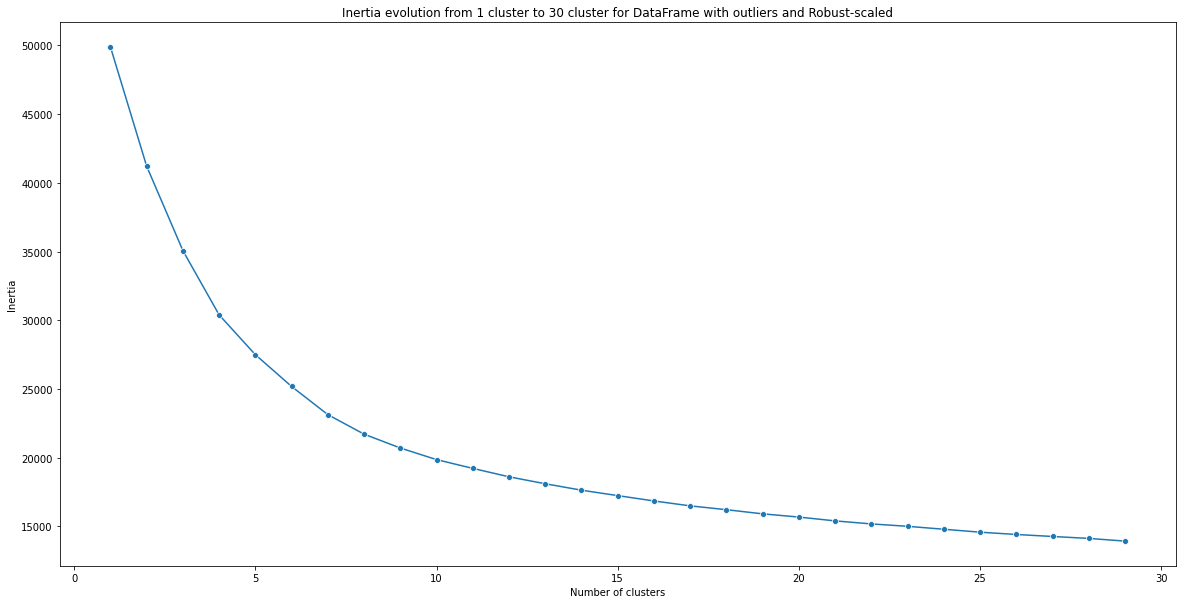

In [289]:
from sklearn.cluster import KMeans

max_k = 30
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(df_robust).inertia_)

fig, ax = plt.subplots(figsize=(20, 10))
plt.title(f"Inertia evolution from 1 cluster to {max_k} cluster for DataFrame with outliers and Robust-scaled")
sns.lineplot(x=range(1, max_k), y=inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

Silhouette score for 3rd model w/ 5 clusters

In [290]:
from sklearn.cluster import KMeans
df_robust_kmeans = KMeans(n_clusters=5).fit(df_robust)


from sklearn.metrics import silhouette_score
silhouette_score(df_robust, df_robust_kmeans.labels_)

0.1991970312959866

Centroids of clusters for 3rd model

In [292]:
columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]

centroids_robust = pd.DataFrame(df_robust_kmeans.cluster_centers_)
centroids_robust.columns = columns
centroids_robust

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.157287,0.173029,0.013163,0.054409,-0.348986,0.372287,0.089871,0.410256,2.064174,0.055022,0.076783,0.134954,-0.069370
1,-0.443834,-1.423754,0.023466,-2.146860,-0.365824,-0.171098,1.430056,0.912216,0.037786,-0.404457,-0.361257,0.508380,-0.290012
2,0.048277,-0.027657,0.054080,0.001036,-0.347503,0.118910,0.155903,0.260841,-0.005329,0.201576,0.060290,0.090520,-0.053135
3,0.029449,0.161710,0.071429,0.190051,-0.376471,3.133996,0.057495,0.242095,0.373373,0.067154,0.029843,0.156225,-0.055462
4,-0.919084,-1.322653,-0.102041,-2.184766,-0.326531,-0.087620,1.281632,1.162203,0.282946,-0.714116,-0.472082,12.070475,-0.387755


Defining cluster for each song in 3rd model

In [293]:
clusters_robust = df_robust_kmeans.predict(df_robust)

df_robust["cluster"] = clusters_robust
df_robust

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.313984,-1.157005,1.000000,-0.955541,-1.0,0.246438,1.063138,-0.002833,5.882353,-0.230769,-0.232633,0.385983,0.0,0
Saudade De Bahia,Antônio Carlos Jobim,0.535620,-0.818841,-0.500000,-0.874033,0.0,-0.355407,0.215967,-0.002921,-0.124567,0.573805,0.154816,-0.401326,0.0,2
"Canta Canta, Minha Gente",Martinho Da Vila,0.823219,-0.019324,-0.500000,-0.610901,0.0,4.881811,0.635112,-0.002825,-0.006920,1.014553,-0.673325,-0.885854,0.0,3
Mulher Eu Sei,Chico César,0.437995,-1.661353,-0.166667,-1.774576,0.0,-0.145851,1.391706,-0.002861,1.806228,0.222453,-0.327071,-0.470335,0.0,1
Rosa Morena,Kurt Elling,0.295515,-1.495169,0.166667,-2.053186,0.0,-0.298407,1.457419,-0.002390,-0.145329,-0.031185,0.046532,0.599701,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,-0.889182,-1.614976,-0.333333,-2.643175,0.0,-0.142498,1.459195,1.109053,-0.289273,-0.730769,-0.826371,9.425455,0.0,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,-0.926121,-1.538647,0.166667,-2.393381,0.0,-0.194468,1.349081,0.659597,-0.384775,-0.793139,-0.952464,7.712477,0.0,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,-1.264908,-1.780362,0.666667,-5.865470,0.0,-0.207879,1.519581,1.504077,-0.330796,-0.795426,-1.257947,0.165425,-1.0,1


In [294]:
df_robust.groupby(by="cluster").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,-0.157287,0.173029,0.013163,0.054409,-0.348986,0.372287,0.089871,0.410256,2.064174,0.055022,0.076783,0.134954,-0.069370
1,-0.443834,-1.423754,0.023466,-2.146860,-0.365824,-0.171098,1.430056,0.912216,0.037786,-0.404457,-0.361257,0.508380,-0.290012
2,0.048529,-0.027848,0.054040,0.001235,-0.347271,0.118369,0.156018,0.260812,-0.005213,0.201839,0.060549,0.090460,-0.053154
3,0.028284,0.162298,0.071588,0.188789,-0.377517,3.131500,0.057115,0.242263,0.372187,0.066134,0.028667,0.156401,-0.055369
4,-0.919084,-1.322653,-0.102041,-2.184766,-0.326531,-0.087620,1.281632,1.162203,0.282946,-0.714116,-0.472082,12.070475,-0.387755


Show songs for each cluster of 3rd model

In [295]:
df_robust.loc[df_robust["cluster"] == 0]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.313984,-1.157005,1.000000,-0.955541,-1.0,0.246438,1.063138,-0.002833,5.882353,-0.230769,-0.232633,0.385983,0.0,0
Aqua De Coco,Marcos Valle,0.569921,-0.014493,0.833333,-0.372468,-1.0,0.167645,0.695498,-0.001509,2.276817,0.829522,-0.823147,0.769531,0.0,0
Samba de Verão,Marcos Valle,0.416887,-0.804348,-0.833333,-1.193644,0.0,-0.404023,1.274487,-0.002680,1.404844,0.889813,-0.114863,-0.903645,0.0,0
Don't Stop the Carnival,Sonny Rollins,-0.153034,-0.514493,-0.833333,-0.640540,0.0,0.053646,0.839357,-0.002924,3.806228,0.831601,-0.383565,1.728640,0.0,0
O Pato (The Duck) - Live At Carnegie Hall/1964,João Gilberto,0.216359,-1.347826,-0.500000,-2.665240,0.0,0.102263,1.384602,1.283237,3.965398,0.970894,1.340626,-1.074123,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
More Abundantly Medley - Live,Ricky Dillard,0.482850,0.456522,-0.666667,0.135518,0.0,0.405700,-0.166539,0.364106,3.647059,0.546778,-0.084318,2.080840,0.0,0
Put A Praise On It - Live,Tasha Cobbs Leonard,-0.126649,0.531401,0.833333,0.607443,0.0,1.428332,-0.156185,-0.002872,3.626298,-0.151767,0.817043,1.484381,0.0,0
Ask For Rain,Gene Moore,-0.575198,-0.608696,0.333333,-0.212580,0.0,-0.318525,0.945920,-0.002924,1.570934,-0.309771,0.067301,1.295501,0.0,0


In [296]:
df_robust.loc[df_robust["cluster"] == 1]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Mulher Eu Sei,Chico César,0.437995,-1.661353,-0.166667,-1.774576,0.0,-0.145851,1.391706,-0.002861,1.806228,0.222453,-0.327071,-0.470335,0.0,1
Rosa Morena,Kurt Elling,0.295515,-1.495169,0.166667,-2.053186,0.0,-0.298407,1.457419,-0.002390,-0.145329,-0.031185,0.046532,0.599701,0.0,1
Desafinado,Stan Getz,-0.192612,-1.429952,-0.333333,-1.673308,0.0,0.152557,1.484060,0.236579,-0.124567,0.012474,0.626371,0.302463,0.0,1
Madalena,Maria Gasolina,0.358839,-1.282609,1.000000,-1.067347,-1.0,-0.021794,1.540893,0.640934,-0.089965,0.555094,-0.677738,-0.972482,0.0,1
The Girl From Ipanema,Stan Getz,0.269129,-1.444444,0.500000,-1.556397,0.0,-0.281643,1.370393,-0.000342,-0.138408,-0.060291,0.267882,1.141822,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Pines Of Rome, P. 141: 3. The Pines Of The Janiculum",Ottorino Respighi,-1.108179,-1.700966,-0.166667,-3.890499,0.0,-0.224644,1.496492,1.325228,-0.307266,-0.793347,-0.624336,2.163651,0.0,1
"Don Giovanni, K.527: Overture",Wolfgang Amadeus Mozart,-0.393140,-1.362319,-0.500000,-1.174214,0.0,-0.310142,1.373945,1.343890,-0.089965,-0.230769,0.263364,1.765506,0.0,1
"Music for Strings, Percussion and Celesta, BB 114: II. Allegro",Béla Bartók,-0.403694,-1.483092,1.000000,-2.557385,-1.0,-0.197821,1.508925,1.423206,-0.274740,-0.203742,0.611098,2.682524,0.0,1


In [297]:
df_robust.loc[df_robust["cluster"] == 2]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,0.535620,-0.818841,-0.500000,-0.874033,0.0,-0.355407,0.215967,-0.002921,-0.124567,0.573805,0.154816,-0.401326,0.0,2
Brigas Nunca Mais,Paula Morelenbaum,0.408971,-0.463768,0.833333,-0.677425,0.0,-0.264878,0.537430,0.115272,0.193772,0.465696,1.343691,-0.252542,0.0,2
Previsao,Bossacucanova,0.356201,0.304348,-0.666667,-0.104232,0.0,-0.295054,0.969008,0.553842,0.096886,0.247401,-0.506936,-0.532663,0.0,2
Blue Bossa - Remastered,Joe Henderson,-0.155673,-0.736715,0.000000,-0.423349,-1.0,-0.043588,0.910399,1.076394,-0.117647,0.997921,-0.974105,0.568709,0.0,2
Mas Que Nada,Rio Combo,0.208443,-0.480676,0.000000,-0.881113,-1.0,-0.412406,0.107628,0.000404,0.429066,1.037422,-0.806817,-0.560230,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worth Fighting For - Live,Brian Courtney Wilson,-0.672823,-0.582126,0.833333,-0.126297,0.0,0.457670,0.015274,-0.002924,-0.421453,-0.407484,1.489470,2.224584,0.0,2
The Potter's House,Jerard & Jovaun,0.166227,-0.429952,-0.666667,-0.013173,0.0,-0.119028,0.038362,-0.002907,0.076125,0.528067,0.338195,0.701575,0.0,2
In The Room,Lexi,0.031662,-0.210145,0.166667,0.602503,-1.0,0.506287,0.876654,-0.002924,0.435986,-0.505198,-0.394398,0.339023,0.0,2


In [298]:
df_robust.loc[df_robust["cluster"] == 3]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
"Canta Canta, Minha Gente",Martinho Da Vila,0.823219,-0.019324,-0.500000,-0.610901,0.0,4.881811,0.635112,-0.002825,-0.006920,1.014553,-0.673325,-0.885854,0.0,3
O Meu Amor É Glòria,Sílvia Pérez Cruz,-0.092348,-0.012077,0.333333,-0.556891,0.0,5.585918,1.066690,-0.002837,3.792388,0.975052,-0.597569,1.041160,0.0,3
Karoliina Kaunis,Maria Gasolina,0.564644,-1.263285,1.000000,-1.372139,-1.0,3.976530,0.928159,0.004292,-0.233910,-0.072765,0.294834,0.327424,0.0,3
Aquarela Do Brasil,Gal Costa,0.036939,-0.454106,-0.666667,-0.998353,0.0,5.736798,1.251399,-0.001799,5.404844,0.544699,0.471291,-0.223348,0.0,3
Vai (Menina amanhã de manhã),Tom Zé,0.348285,-0.260870,0.000000,-0.498765,0.0,3.037720,1.402362,-0.002924,0.048443,0.783784,0.223676,-0.606076,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
If He Did It Before....Same God - Live,Tye Tribbett,0.182058,0.125604,-0.333333,0.316977,-1.0,1.948030,-0.105497,-0.002918,-0.473356,0.546778,1.075149,0.250584,0.0,3
Follow God,Kanye West,-0.026385,0.391304,-0.666667,0.631484,0.0,6.072087,-0.168994,-0.002905,-0.570242,0.035343,1.614771,-1.469197,0.0,3
Happy - Live/Remastered,Tasha Cobbs Leonard,-0.364116,0.355072,0.333333,0.260991,0.0,6.524728,0.136045,-0.002924,-0.178547,0.045738,1.420848,0.747262,0.0,3


In [299]:
df_robust.loc[df_robust["cluster"] == 4]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
My Favorite Things,John Coltrane,-0.691293,-1.198068,-0.166667,-1.828421,0.0,-0.362112,1.063138,0.718695,-0.083045,-0.274428,1.485110,7.334802,-1.0,4
Deliverance,Opeth,-0.675462,0.567633,-0.166667,0.548658,-1.0,-0.165968,-0.168935,1.095056,0.463668,-0.295218,-0.578068,7.244099,0.0,4
In The Mist She Was Standing,Opeth,-0.926121,0.538647,0.666667,0.122015,-1.0,2.434199,-0.169195,0.337668,1.266436,-0.759459,0.577910,7.645267,0.0,4
A Lake,Emily A. Sprague,-0.883905,-0.927536,-0.333333,-1.889182,0.0,-0.167645,1.508925,1.359442,-0.062284,-0.789397,-0.890025,7.102815,-1.0,4
1/1 - Remastered 2004,Brian Eno,-0.736148,-1.773019,-0.500000,-3.911905,0.0,-0.254820,1.574638,1.416985,-0.159170,-0.790437,-0.959651,9.994653,0.0,4
Essence,Laraaji,-1.068602,-1.680193,-0.833333,-2.463692,0.0,-0.184409,1.563982,1.441869,-0.462976,-0.800208,-1.273325,19.198730,-1.0,4
Rasch Und Mäßig Bewegt,Asmus Tietchens,-1.185488,-0.857488,1.000000,-3.225753,-1.0,-0.367142,1.537341,1.272350,1.543253,-0.436590,1.452134,11.856746,-3.0,4
A Rainbow in the Curved Air - Instrumental,Terry Riley,-0.902375,-0.763285,-0.500000,-1.665569,0.0,-0.088852,1.024065,0.899099,0.020761,-0.594595,1.416990,10.946739,0.0,4
Plateau,The Orb,-0.849604,-0.246377,1.000000,-1.183435,0.0,0.082146,-0.143327,0.653376,1.231834,-0.714761,-0.992971,6.660549,-3.0,4


Show scatterplot for danceability vs. tempo for 3rd model

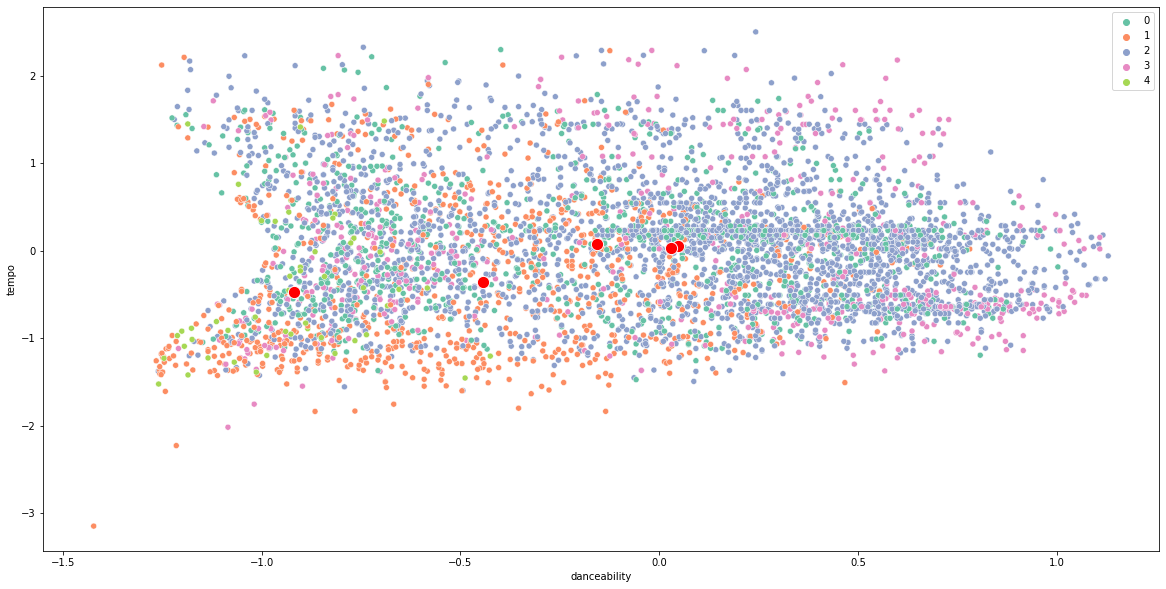

In [300]:
df_robust_plot = df_robust.reset_index()

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_robust_plot, x="danceability", y="tempo", hue="cluster", palette="Set2")
sns.scatterplot(data=centroids_robust, x="danceability", y="tempo", color="red", s=150)
plt.show()

Show scatterplot for danceability vs. duration_ms for 3rd model

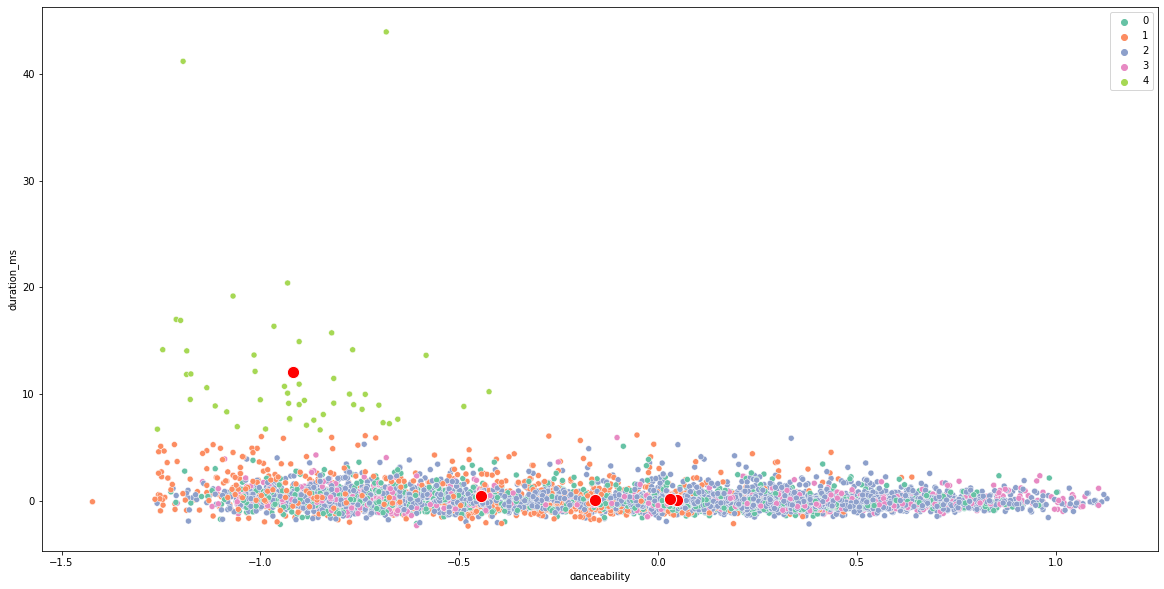

In [305]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_robust_plot, x="danceability", y="duration_ms", hue="cluster", palette="Set2")
sns.scatterplot(data=centroids_robust, x="danceability", y="duration_ms", color="red", s=150)
plt.show()

Show scatterplot for danceability vs. time_signature for 3rd model

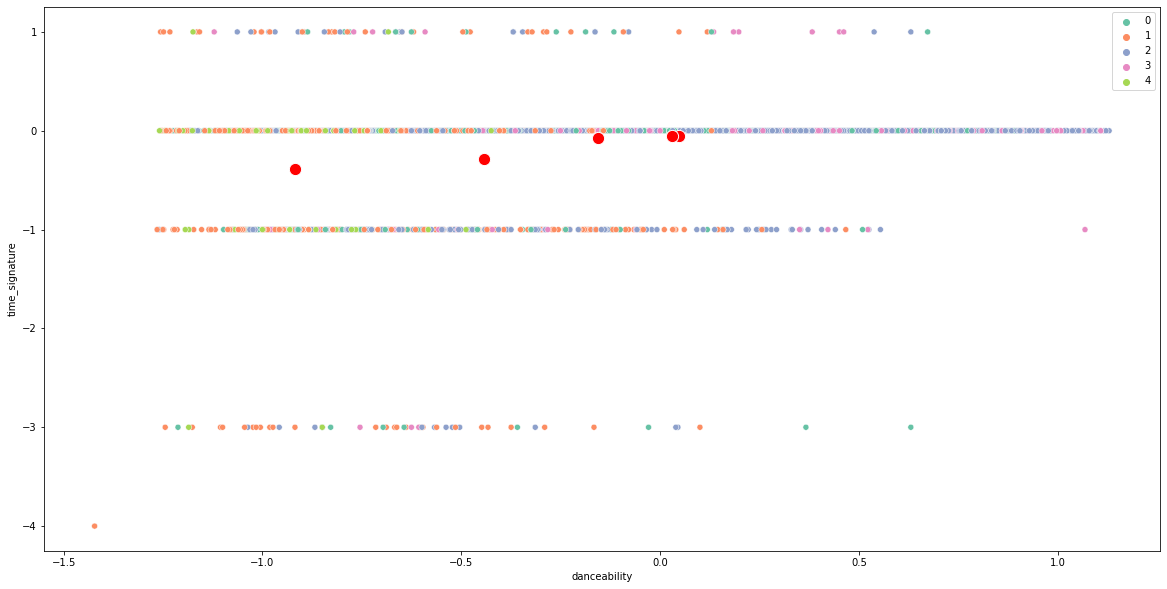

In [302]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_robust_plot, x="danceability", y="time_signature", hue="cluster", palette="Set2")
sns.scatterplot(data=centroids_robust, x="danceability", y="time_signature", color="red", s=150)
plt.show()